### Samantha Beard
#### Weeks 9-10


In [1]:
# import libraries
import urllib.request, urllib.parse, urllib.error
import requests
from bs4 import BeautifulSoup
import ssl
import re
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

### Exercise 1, Activity 9: Top 100 ebooks' name extraction from Gutenberg.org
What is Project Gutenberg? -
Project Gutenberg is a volunteer effort to digitize and archive cultural works, to "encourage the creation and distribution of eBooks". It was founded in 1971 by American writer Michael S. Hart and is the oldest digital library. This longest-established ebook project releases books that entered the public domain, and can be freely read or downloaded in various electronic formats.

#### Ignore SSL errors (this code will be given)

In [2]:
# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

#### Read the HTML from the URL

In [3]:
# Read the HTML from the URL and pass on to BeautifulSoup
top100url = 'https://www.gutenberg.org/browse/scores/top'
response = requests.get(top100url)

#### Write a small function to check the status of web request

In [4]:
def status_check(r):
    if r.status_code==200:
        print("Success!")
        return 1
    else:
        print("Failed!")
        return -1

In [5]:
# call function to check status
status_check(response)

Success!


1

#### Decode the response and pass on to BeautifulSoup for HTML parsing

In [6]:
contents = response.content.decode(response.encoding)

In [7]:
soup = BeautifulSoup(contents, 'html.parser')

#### Find all the href tags and store them in the list of links. Check how the list looks like - print first 30 elements

In [8]:
# Empty list to hold all the http links in the HTML page
lst_links=[]

In [9]:
# Find all the href tags and store them in the list of links
for link in soup.find_all('a'):
    #print(link.get('href'))
    lst_links.append(link.get('href'))

In [10]:
lst_links[:30]

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7']

#### Use regular expression to find the numeric digits in these links.  These are the file number for the Top 100 books.

In [11]:
# empty list for file numbers
booknum=[]

* Number 19 to 118 in the original list of links have the Top 100 ebooks' number.
* Loop over appropriate range and use regex to find the numeric digits in the link (href) string.
* Hint: Use findall() method

In [12]:
for i in range(19,119):
    link=lst_links[i]
    link=link.strip()
    # Regular expression to find the numeric digits in the link (href) string
    n=re.findall('[0-9]+',link)
    if len(n)==1:
        # Append the filenumber casted as integer
        booknum.append(int(n[0]))

In [13]:
# print file numbers
print ("\nThe file numbers for the top 100 ebooks on Gutenberg are shown below\n"+"-"*70)
print(booknum)


The file numbers for the top 100 ebooks on Gutenberg are shown below
----------------------------------------------------------------------
[1, 1, 7, 7, 30, 30, 84, 1342, 2701, 1513, 145, 2641, 100, 37106, 16389, 67979, 6761, 394, 2160, 4085, 1259, 5197, 6593, 11, 64317, 72971, 72969, 174, 72966, 2542, 1952, 1080, 844, 5200, 98, 345, 2554, 76, 28054, 25344, 43, 408, 1260, 72968, 72970, 1400, 72972, 1661, 1232, 6130, 2591, 72967, 46, 5740, 58585, 205, 219, 1727, 1998, 2000, 4300, 72963, 2600, 74, 768, 3207, 72950, 30254, 23, 36034, 1184, 7370, 45, 1497, 41445, 2814, 996, 8492, 514, 42324, 33283, 8800, 4363, 55, 600, 244, 730, 27827, 35, 2680, 16, 3296]


#### How does the soup object's text look like? Use .text() method and print only first 2000 characters (i.e. do not print the whole thing, it is long).

In [14]:
print(soup.text[:2000])





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright How-To
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2024-02-16289145
last 7 days2086226
last 30 days7432239



Top 100 EBooks yesterday
T

#### Search in the extracted text (using regular expression) from the soup object to find the names of top 100 Ebooks (Yesterday's rank)

In [15]:
# Temp empty list of Ebook names
lst_titles_temp=[]

#### Create a starting index. It should point at the text "Top 100 Ebooks yesterday". Hint: Use splitlines() method of the soup.text. It splits the lines of the text of the soup object.

In [16]:
start_idx=soup.text.splitlines().index('Top 100 EBooks yesterday')

#### Loop 1-100 to add the strings of next 100 lines to this temporary list. Hint: `splitlines()` method

In [17]:
for i in range(100):
    lst_titles_temp.append(soup.text.splitlines()[start_idx+2+i])

#### Use regular expression to extract only text from the name strings and append to an empty list
* Hint: Use `match` and `span` to find indices and use them

In [18]:
lst_titles=[]
for i in range(100):
    id1,id2=re.match('^[a-zA-Z ]*',lst_titles_temp[i]).span()
    lst_titles.append(lst_titles_temp[i][id1:id2])

#### Print the list of titles

In [19]:
for l in lst_titles:
    print(l)

Top 
Top 
Top 
Top 


Top 

Frankenstein
Pride and Prejudice by Jane Austen 
Moby Dick
Romeo and Juliet by William Shakespeare 
Middlemarch by George Eliot 
A Room with a View by E
The Complete Works of William Shakespeare by William Shakespeare 
Little Women
The Enchanted April by Elizabeth Von Arnim 
The Blue Castle
The Adventures of Ferdinand Count Fathom 
Cranford by Elizabeth Cleghorn Gaskell 
The Expedition of Humphry Clinker by T
The Adventures of Roderick Random by T
Twenty years after by Alexandre Dumas and Auguste Maquet 
My Life 
History of Tom Jones
Alice
The Great Gatsby by F
A dead man
The girl from nowhere by Mrs
The Picture of Dorian Gray by Oscar Wilde 
The horror at Red Hook by H
A Doll
The Yellow Wallpaper by Charlotte Perkins Gilman 
A Modest Proposal by Jonathan Swift 
The Importance of Being Earnest
Metamorphosis by Franz Kafka 
A Tale of Two Cities by Charles Dickens 
Dracula by Bram Stoker 
Crime and Punishment by Fyodor Dostoyevsky 
Adventures of Huckleberry Fi

### Exercise 2, Activity 10: Build your own movie database by reading from an API

#### Load the secret API key (you have to get one from OMDB website and use that, 1000 daily limit) from a JSON file, stored in the same folder into a variable
Hint: Use **`json.loads()`**

#### Note: The following cell will not be executed in the solution notebook because the author cannot give out his private API key. 
#### Students/users/instructor will need to obtain a key and store in a JSON file. 
#### For the code's sake, we are calling this file `APIkeys.json`. But you need to store your own key in this file.

In [20]:
# open and load data with API key
with open('APIkeys.json') as f:
    keys = json.load(f)
    omdbapi = keys['OMDBapi']

#### The final URL to be passed should look like: http://www.omdbapi.com/?t=movie_name&apikey=secretapikey 
Do the following,
* Assign the OMDB portal (http://www.omdbapi.com/?) as a string to a variable `serviceurl` (don't miss the `?`)
* Create a variable `apikey` with the last portion of the URL ("&apikey=secretapikey"), where `secretapikey` is your own API key (an actual code)
* The movie name portion i.e. "t=movie_name" will be addressed later

In [21]:
# url variables
serviceurl = 'http://www.omdbapi.com/?'
apikey = '&apikey='+omdbapi

#### Write a utility function `print_json` to print nicely the movie data from a JSON file (which we will get from the portal)
Here are the keys of a JSON file,

'Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 'Actors', 'Plot', 'Language','Country', 'Awards', 'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID'

In [22]:
# function to print json data by parsing out by data key
def print_json(json_data):
    list_keys=['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 
               'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings', 
               'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    print("-"*50)
    for k in list_keys:
        if k in list(json_data.keys()):
            print(f"{k}: {json_data[k]}")
    print("-"*50)

#### Write a utility function to download a poster of the movie based on the information from the jason dataset and save in your local folder

* Use `os` module
* The poster data is stored in the JSON key 'Poster'
* You may want to split the name of the Poster file and extract the file extension only. Let's say the extension is ***'jpg'***.
* Then later join this extension to the movie name and create a filename like ***movie.jpg***
* Use the Python command `open` to open a file and write the poster data. Close the file after done.
* This function may not return anything. It just saves the poster data as an image file.

In [23]:
# function to download movie poster 
def save_poster(json_data):
    import os
    title = json_data['Title']
    poster_url = json_data['Poster']
    # Splits the poster url by '.' and picks up the last string as file extension
    poster_file_extension=poster_url.split('.')[-1]
    # Reads the image file from web
    poster_data = urllib.request.urlopen(poster_url).read()
        
    savelocation=os.getcwd()+'\\'+'Posters'+'\\'
    # Creates new directory if the directory does not exist. Otherwise, just use the existing path.
    if not os.path.isdir(savelocation):
        os.mkdir(savelocation)
    
    filename=savelocation+str(title)+'.'+poster_file_extension
    f=open(filename,'wb')
    f.write(poster_data)
    f.close()

### Write a utility function `search_movie` to search a movie by its name, print the downloaded JSON data (use the `print_json` function for this) and save the movie poster in the local folder (use `save_poster` function for this)

* Use `try-except` loop for this i.e. try to connect to the web portal, if successful proceed but if not (i.e. exception raised) then just print an error message
* Here use the previously created variables `serviceurl` and `apikey`
* You have to pass on a dictionary with a key `t` and the movie name as the corresponding value to `urllib.parse.urlencode()` function and then add the `serviceurl` and `apikey` to the output of the function to construct the full URL
* This URL will be used for accessing the data
* The JSON data has a key called `Response`. If it is `True`, that means the read was successful. Check this before processing the data. If not successful, then print the JSON key `Error`, which will contain the appropriate error message returned by the movie database.

In [24]:
# function to search for movie based on title requested
def search_movie(title):
    try:
        # concat url
        url = serviceurl + urllib.parse.urlencode({'t': str(title)})+apikey
        
        # print what title is being retrieved
        print(f'Retrieving the data of "{title}" now... ')
        
        # print concatenated url 
        print(url)
        
        # request url
        uh = urllib.request.urlopen(url)
        
        # read page
        data = uh.read()
        
        #load json data
        json_data=json.loads(data)
        
        # if statement for printing or displaying error from API
        if json_data['Response']=='True':
            print_json(json_data)
            # Asks user whether to download the poster of the movie
            if json_data['Poster']!='N/A':
                save_poster(json_data)
        else:
            print("Error encountered: ",json_data['Error'])
    
    # error catching if request does not work
    except urllib.error.URLError as e:
        print(f"ERROR: {e.reason}")

#### Test `search_movie` function by entering *Titanic*

In [25]:
# call api for data on Titanic
search_movie("Titanic")

Retrieving the data of "Titanic" now... 
http://www.omdbapi.com/?t=Titanic&apikey=8752becf
--------------------------------------------------
Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian, French
Country: United States, Mexico
Awards: Won 11 Oscars. 126 wins & 83 nominations total
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.9/10'}, {'Source': 'Rotten Tomatoes', 'Value': '88%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.9
imdbVotes: 1,267,049
imdbID: tt0120338
--------------------------------------------------


#### Test `search_movie` function by entering "*Random_error*" (obviously this will not be found and you should be able to check whether your error catching code is working properly)

In [26]:
# check that error catching code is working
search_movie("Random_error")

Retrieving the data of "Random_error" now... 
http://www.omdbapi.com/?t=Random_error&apikey=8752becf
Error encountered:  Movie not found!


### Exercise 3

#### a. Connect to an API of your choice and do a simple data pull - you can use any API - except the API you have selected for your project. In previous versions of this course we have always used Twitter, but with recent organizational changes at Twitter, it has become increasingly difficult to access the free APIs available at Twitter. You are more than welcome to try to use Twitter's API for this portion of the assignment, but please note, there has been some inconsistency experienced when following along with their documentation posted.

#### b. Connect to the API and do a "Get" call/operation on the API to return a subset of data from the API

In [27]:
# API url
dog_facts_url = 'http://dog-api.kinduff.com/api/facts?number='

In [39]:
# number of facts ranomizer and convert int to string to be able to concatenate
facts_num = str(random.randint(1,25))
facts_num

'13'

In [40]:
def get_dog_facts(facts_num):
    try:
        # concat the URL and number randomizer
        facts_url = dog_facts_url + facts_num
        
        # print the number of facts being retrieved
        print(f'Retrieving "{facts_num}" facts now... ')
        
        # print concatenated url
        print(facts_url)
        
        # open url
        dog_uh = urllib.request.urlopen(facts_url)
        
        # read webpage
        dog_data = dog_uh.read()
        
        # load json data
        dog_json_data=json.loads(dog_data)
        
        # turn facts key into list
        dog_data_list = dog_json_data['facts']
        
        # call function to print data
        print_dog_json_data(dog_data_list)
    
    # error capturing
    except urllib.error.URLError as e:
        print(f"ERROR: {e.reason}")

In [41]:
def print_dog_json_data(dog_data_list):
    
    # loop through list to print each string separately for readability
    for i in range(0, len(dog_data_list)):
        print('\n')
        print(dog_data_list[i])

In [43]:
# call function to call api and print data
get_dog_facts(facts_num)

Retrieving "13" facts now... 
http://dog-api.kinduff.com/api/facts?number=13


There is a dog-shaped building in New Zealand.


In 1860's San Francisco, two stray dogs who were best friends became local celebrities. Their exploits were celebrated in local papers and they were granted immunity from the city's dog catchers.


In ancient China, people kept warm by putting dogs up their sleeves.


Obesity is the #1 health problem among dogs.


During the Middle Ages, mixed breeds of peasants’ dogs were required to wear blocks around their necks to keep them from breeding with noble hunting dogs. Purebred dogs were very expensive and hunting became the province of the rich.


Puppies then take a year or more to gain the other half of their body weight.


Dogs do not have an appendix. Why haven’t humans gotten rid of theirs yet?


One kind of Pekingese is referred to as a "sleeve" because it was bred to fit into a Chinese empress’ sleeves, which was how it was often carried around.


Pugs an

### Exercise 4
Using one of the datasets provided in Weeks 7 & 8, or a dataset of your own, choose 3 of the following visualizations to complete. You must submit via PDF along with your code. You are free to use Matplotlib, Seaborn or another package if you prefer.

#### Setup

In [32]:
# import file using pandas and set up as df
vg_sales_df = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")

# remove data without a year of release
vg_sales_df = vg_sales_df[vg_sales_df.Year_of_Release != "N/A"]

# Group by year of release and genre
vg_sales_df_grouped = vg_sales_df.groupby(['Year_of_Release', 'Genre']).Global_Sales.agg(['sum']).reset_index(drop=False)

# df2 = df.groupby(['Name', 'Type']).Value.agg([('AddedValue', 'sum'), ('Occurences', 'count')]).reset_index(drop=False)

# group 2 for shooter genre
vg_sales_df_grouped2 = vg_sales_df_grouped[vg_sales_df_grouped.Genre == 'Shooter']

# count the number of sales by genre
vg_sales_df_genres = vg_sales_df.groupby(['Genre'])['Genre'].count().reset_index(name="Count")

#### a. Line

Text(0.5, 1.0, 'Shooter Video Game Sales by Year')

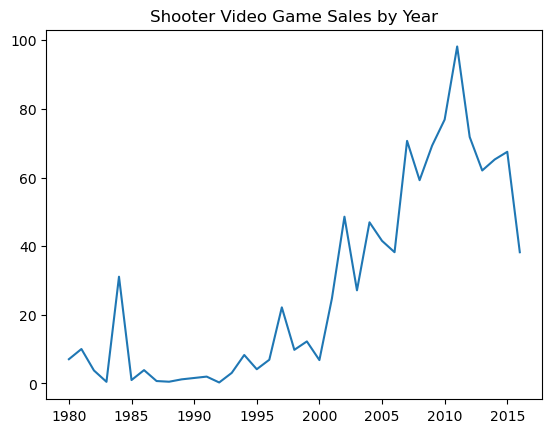

In [33]:
# line graph using group 2 to compare sales of shooter games per year
plt.plot('Year_of_Release', 'sum', data = vg_sales_df_grouped2)
plt.title("Shooter Video Game Sales by Year")

#### b. Scatter

In [34]:
# plt.scatter(vg_sales_df_grouped2['Year_of_Release'], vg_sales_df_grouped2['sum'])
# plt.title("Shooter Video Game Sales by Year")

#### c. Bar

In [35]:
# plt.bar('Year_of_Release', 'sum', data = vg_sales_df_grouped2)
# plt.title("Shooter Video Game Sales by Year")

#### d. Histogram

Text(0.5, 1.0, 'Video Game Sales by Genre')

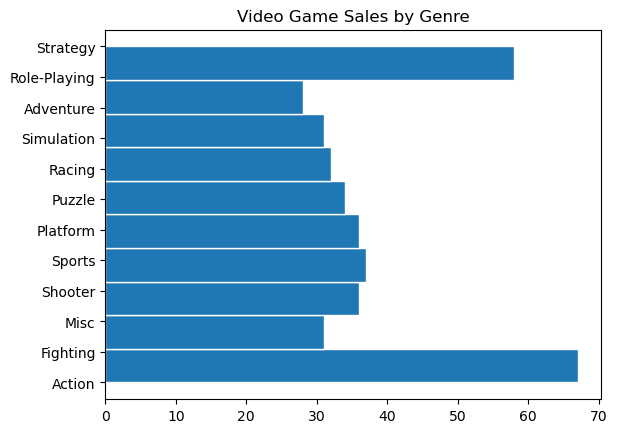

In [36]:
# histogramshowing the number of sales per genre
plt.hist(vg_sales_df_grouped['Genre'], bins = 10, orientation = "horizontal", edgecolor = "white")
plt.title("Video Game Sales by Genre")

#### e. Density Plot

In [37]:
# vg_sales_df_grouped2['Year_of_Release'].plot(kind='density')
# plt.title("Shooter Video Games Density by Year")

#### f. Pie Chart

Text(0.5, 1.0, 'Video Games by Genre')

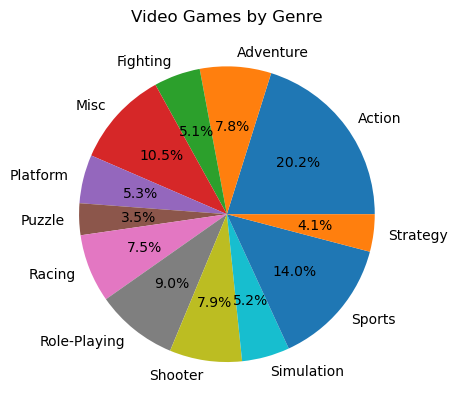

In [38]:
# pie chart showing percentage of sales for each genre
plt.pie(vg_sales_df_genres["Count"], labels = vg_sales_df_genres["Genre"], autopct='%1.1f%%')
plt.title("Video Games by Genre")